That last notebook got messy so I'm making a new cleaner one that will enable me to sample over both emulators simultaneously. 

In [1]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
import numpy as np
import h5py
from chainconsumer import ChainConsumer
#from corner import corner
from ast import literal_eval
from pearce.emulator import LemonPepperWet
from os import path
from scipy.linalg import inv

 /u/ki/swmclau2/.conda/envs/hodemulator/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning:numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.


In [3]:
tf = ['/u/ki/swmclau2/des/Aemulators/wp_zheng07/PearceWpCosmo.hdf5',
       '/u/ki/swmclau2/des/Aemulators/ds_zheng07/PearceDsCosmo.hdf5']

In [4]:
emus = []
for t in tf:
    emus.append(LemonPepperWet(t, fixed_params = {'z':0.0}) )

In [5]:
emu = emus[0]

In [6]:
true_data_wp = np.load('/u/ki/swmclau2/Git/pearce/bin/mock_measurements/HOD3mock_wp.npy')
true_data_ds = np.load('/u/ki/swmclau2/Git/pearce/bin/mock_measurements/HOD3mock_ds.npy')

In [7]:
true_data = np.zeros((2,18))
true_data[0]=true_data_wp
true_data[1]=true_data_ds

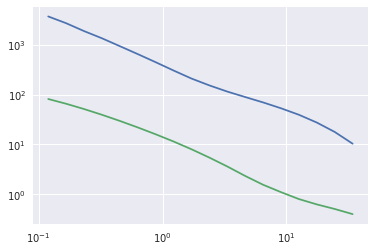

In [8]:
plt.plot(emu.scale_bin_centers, true_data[0])
plt.plot(emu.scale_bin_centers, true_data[1])

plt.loglog();

In [9]:
rbc = emu.scale_bin_centers#[-len(emu.scale_bin_centers):]

In [10]:
h = 0.6777
cosmo_pnames = ['ombh2', 'omch2', 'w0', 'ns', 'H0', 'Neff', 'sigma8']
cosmo_true_vals = np.array([0.048206*h**2, 0.307115*h**2 -0.048206*h**2 ,\
                            -1, 0.9667, \
                                h*100, 3.046, 0.8228]) #mdpl2

cat_val_dict = dict(zip(cosmo_pnames, cosmo_true_vals))

In [11]:
true_param_dict = cat_val_dict.copy()
hod_params = {'alpha': 1.083, 'conc_gal_bias': 1.0,\
              'logM0': 13.2,'logM1': 14.2,'sigma_logM': 0.2}#sim_info['hod_params']
#hod_params = {'alpha': 0.95, 'conc_gal_bias': 1.0, 'logM0': 13.2,'logM1': 14.5, 'sigma_logM': 0.2}#sim_info['hod_params']


#hod_params['mean_occupation_centrals_assembias_param1'] = 0.0
#hod_params['mean_occupation_satellites_assembias_param1'] =0.0
#hod_params['mean_occupation_centrals_assembias_slope1'] = 0.0
#hod_params['mean_occupation_satellites_assembias_slope1'] = 0.0
#hod_params['mean_occupation_centrals_assembias_corr1'] = 0.0
#hod_params['mean_occupation_satellites_assembias_corr1'] =0.0

#for pname in emu.get_param_names():
#    if 'mean_occupation' in pname:
#        hod_params[pname] = 0.0

for hp, hv in hod_params.iteritems():
    if hp == 'logMmin':
        continue
    true_param_dict[hp] = hv

true_param_dict['conc_gal_bias'] = 1.0

In [12]:
true_data

array([[3.67046115e+03, 2.68587097e+03, 1.86704547e+03, 1.33957041e+03,
        9.30848932e+02, 6.45761466e+02, 4.44257796e+02, 3.02746585e+02,
        2.09074584e+02, 1.52330606e+02, 1.14548962e+02, 8.90682088e+01,
        6.94674502e+01, 5.30164183e+01, 3.92803031e+01, 2.74329581e+01,
        1.77901804e+01, 1.03439673e+01],
       [8.12760963e+01, 6.53112366e+01, 5.11718897e+01, 3.92571969e+01,
        2.95591990e+01, 2.18952850e+01, 1.59647482e+01, 1.14391216e+01,
        7.99808271e+00, 5.44370980e+00, 3.61379155e+00, 2.33425032e+00,
        1.55491234e+00, 1.10505031e+00, 8.02946770e-01, 6.28019530e-01,
        5.08370232e-01, 4.01059480e-01]])

In [13]:
true_param_dict

{'H0': 67.77,
 'Neff': 3.046,
 'alpha': 1.083,
 'conc_gal_bias': 1.0,
 'logM0': 13.2,
 'logM1': 14.2,
 'ns': 0.9667,
 'ombh2': 0.022139921041739997,
 'omch2': 0.11891102387661,
 'sigma8': 0.8228,
 'sigma_logM': 0.2,
 'w0': -1.0}

In [14]:
true_data[0]

array([3670.46114938, 2685.87097264, 1867.04546879, 1339.57041135,
        930.84893245,  645.7614655 ,  444.25779641,  302.74658502,
        209.07458398,  152.33060633,  114.54896197,   89.06820881,
         69.46745023,   53.01641832,   39.28030315,   27.43295814,
         17.7901804 ,   10.34396725])

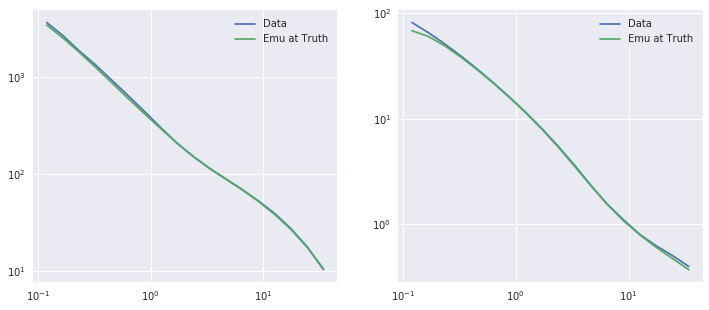

In [15]:
fig = plt.figure(figsize = (12,5))
for i in xrange(len(emus)):
    plt.subplot(1,2,i+1)
    true_pred = emus[i].emulate_wrt_r(true_param_dict).squeeze()
    plt.plot(rbc, true_data[i], label = 'Data')
    plt.plot(rbc, 10**true_pred, label = 'Emu at Truth')

    plt.loglog()
    plt.legend(loc='best')
plt.show();

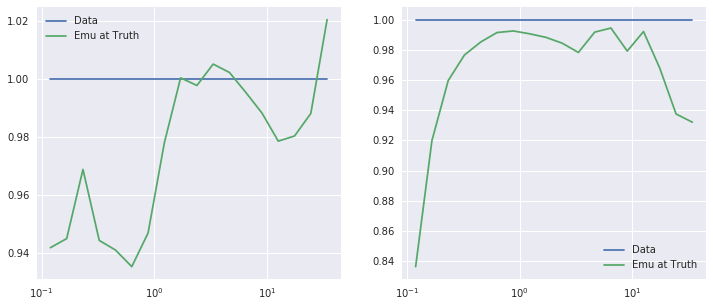

In [16]:
fig = plt.figure(figsize = (12,5))
for i in xrange(len(emus)):
    plt.subplot(1,2,i+1)
    true_pred = emus[i].emulate_wrt_r(true_param_dict).squeeze()
    plt.plot(rbc, np.ones_like(true_data[i]), label = 'Data')
    plt.plot(rbc, (10**true_pred)/true_data[i], label = 'Emu at Truth')
    plt.legend(loc='best')
    plt.xscale('log')
plt.show();